# Logistic Regression 

## Hypothesis:  
Determine what features best predict which people identify themselves as "Data Scientists" based on the other features of the data.  

The formal definition of Data Scientist is not clear.  Job criteria are random, focused on different areas of Data Science, and not consistent across organizations.  So, what does one really need to have in order to call themselves a Data Scientist?  In this capstone, that is what we will try to determine.

## Data: 
The data used for this project was obtained from Kaggle's recent survey across 16,000 professionals working in the field of Data Science.  The survey had multiple questions and responses from the population that help to define the true characteristics and values that make up a "Data Scientist" according to people actively working in this field.  The term "Data Scientist" has taken on multiple definitions, and in this project we attempt to determine what features ultimately define the people that actually call themselves by the title, "Data Scientist". 

The data is available here:
https://www.kaggle.com/kaggle/kaggle-survey-2017/data

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

%matplotlib inline

In [134]:
data_file = 'multipleChoiceResponses.csv'

In [135]:
df = pd.read_csv(data_file, encoding='latin-1', low_memory=False)

In [136]:
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
# Removing these data elements as they are not normalized and not considered as valid features for the purposes of this Capstone
del df['Country']
del df['CompensationAmount']
del df['CompensationCurrency']

In [138]:
sorted(df.columns)

['Age',
 'AlgorithmUnderstandingLevel',
 'BlogsPodcastsNewslettersSelect',
 'CareerSwitcher',
 'CodeWriter',
 'CoursePlatformSelect',
 'CurrentEmployerType',
 'CurrentJobTitleSelect',
 'DataScienceIdentitySelect',
 'EmployerIndustry',
 'EmployerMLTime',
 'EmployerSearchMethod',
 'EmployerSize',
 'EmployerSizeChange',
 'EmploymentStatus',
 'FirstTrainingSelect',
 'FormalEducation',
 'GenderSelect',
 'HardwarePersonalProjectsSelect',
 'JobFactorCommute',
 'JobFactorCompanyFunding',
 'JobFactorDepartment',
 'JobFactorDiversity',
 'JobFactorExperienceLevel',
 'JobFactorImpact',
 'JobFactorIndustry',
 'JobFactorLanguages',
 'JobFactorLeaderReputation',
 'JobFactorLearning',
 'JobFactorManagement',
 'JobFactorOffice',
 'JobFactorPublishingOpportunity',
 'JobFactorRemote',
 'JobFactorSalary',
 'JobFactorTitle',
 'JobFunctionSelect',
 'JobHuntTime',
 'JobSatisfaction',
 'JobSearchResource',
 'JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceEnterpriseTools',
 'JobSk

In [139]:
label = "DataScienceIdentitySelect"

Based on the available information in the data set, we are selecting the following features.  We will transform the features and then select the best features that will tell us whether or not it is a good indicator of whether or not someone would consider themselves a Data Scientist.

In [140]:
df.dropna(subset=["Age",
                  "FormalEducation", 
                  "WorkToolsFrequencyJupyter",
                  "WorkToolsFrequencyPython",
                  "CurrentJobTitleSelect",
                  "EmploymentStatus",
                  "EmployerIndustry",
                  "MajorSelect", 
                  "Tenure",
                  "EmploymentStatus",
                  "AlgorithmUnderstandingLevel",
                  "PastJobTitlesSelect",
                  "ParentsEducation",
                  label], inplace=True)

In [141]:
features = pd.DataFrame()

In [142]:
features = []
for col in df.columns:
    if col == 'Age' or col == 'DataScienceIdentitySelect': 
        continue
    new_df = pd.get_dummies(df[col])
    new_df.columns =["{}-{}".format(col, c) for c in new_df.columns]
    features.append(new_df)
features = pd.concat(features, axis=1)

In order to create somewhat decent bins of data, let's look at the histogram of the Age feature.

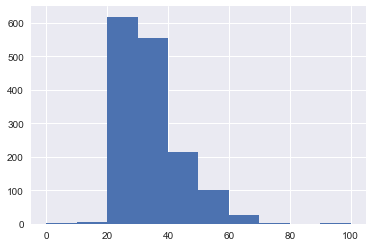

In [143]:
df.Age.hist()

In [144]:
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_names = ['Age-0-20','Age-20-30','Age-30-40','Age-40-50','Age-50-60','Age-60-100']
categories = pd.cut(df['Age'], age_bins, labels=age_names)
age_categories = pd.get_dummies(categories)

In [145]:
features = pd.concat([features, age_categories], axis=1)

Now that we have the features identified and formatted properly, let's perform Logistic Regression to see how well these features can predict whether or not someone would call themselves a "Data Scientist" or not.

In [146]:
df.loc[df[label] == 0, label] = 'No'
df[label].value_counts()

Yes                       715
Sort of (Explain more)    461
No                        344
Name: DataScienceIdentitySelect, dtype: int64

In [147]:
X = features.as_matrix()
Y = df[label].as_matrix()

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [149]:
model = LogisticRegression(multi_class='ovr')

In [150]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [151]:
model.score(X_test, y_test)

0.45065789473684209

In [152]:
model.score(features, df[label])

0.89013157894736838

In [153]:
pd.Series(model.predict(X_train)).value_counts()

Yes                       560
Sort of (Explain more)    373
No                        283
dtype: int64

In [154]:
pd.Series(model.predict(X_test)).value_counts()

Yes                       152
Sort of (Explain more)     85
No                         67
dtype: int64

89% isn't too bad, but there might be some value stil in the features that we have selected.  So let's go through the features and see which ones are the best for predicting our label.

In [155]:
kbest = SelectKBest(score_func=chi2)

In [156]:
features.head()

,GenderSelect-A different identity,GenderSelect-Female,GenderSelect-Male,"GenderSelect-Non-binary, genderqueer, or gender non-conforming",EmploymentStatus-Employed full-time,EmploymentStatus-Employed part-time,"EmploymentStatus-Independent contractor, freelancer, or self-employed",CodeWriter-Yes,CurrentJobTitleSelect-Business Analyst,CurrentJobTitleSelect-Computer Scientist,...,JobSatisfaction-7,JobSatisfaction-8,JobSatisfaction-9,JobSatisfaction-I prefer not to share,Age-0-20,Age-20-30,Age-30-40,Age-40-50,Age-50-60,Age-60-100
4,0,0,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
9,0,0,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
14,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
23,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
33,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [157]:
kbest.fit_transform(features, df[label])

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [158]:
records = list(zip(kbest.scores_.tolist(),features.columns.tolist() ))

In [159]:
feature_scores = pd.DataFrame.from_records(records)

In [160]:
feature_scores.columns = ["Score", "feature"]

In [161]:
feature_scores.sort_values(by="Score", ascending=False).head()

,Score,feature
21,43.277890,CurrentJobTitleSelect-Software Developer/Softw...
1827,37.922086,FormalEducation-Doctoral degree
7465,37.719333,AlgorithmUnderstandingLevel-Enough to run the ...
1826,33.694344,FormalEducation-Bachelor's degree
1846,33.046463,Tenure-1 to 2 years


In [162]:
feature_scores.describe()

,Score
count,1.008100e+04
mean,2.109996e+00
std,1.830158e+00
min,7.009055e-30
25%,1.125874e+00
50%,1.857892e+00
75%,2.297180e+00
max,4.327789e+01


Let's select only those features where the chi2 score is above 20

In [163]:
feature_scores = feature_scores[feature_scores['Score']>20]

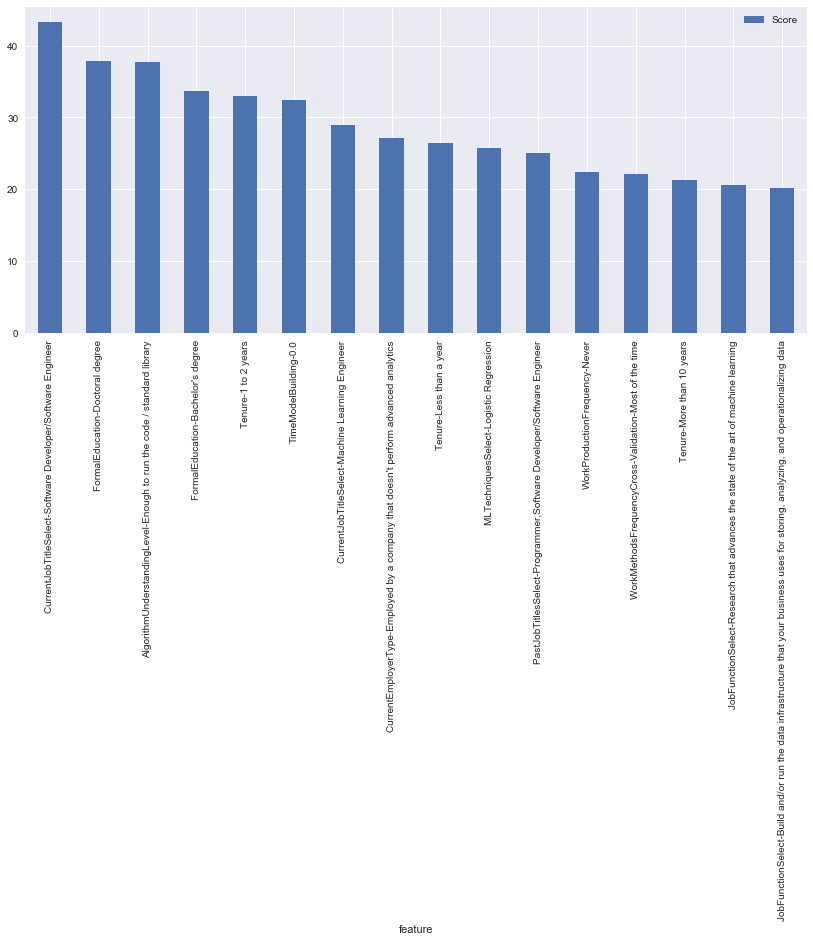

In [164]:
# ADd y-label and a title

feature_scores.set_index(["feature"]).sort_values(by="Score", ascending=False).plot(figsize=(14,6), kind='bar')

In [165]:
feature_list = feature_scores.feature.tolist()
final_features = features[feature_list]

In [166]:
X_train, X_test, y_train, y_test = train_test_split(final_features.as_matrix(), df[label], test_size=0.2, random_state=0)

In [167]:
model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.54440789473684215

In [168]:
model.score(X_test, y_test)

0.54276315789473684

In [169]:
model.score(final_features, df[label])

0.54407894736842111

In [171]:
top_k = feature_scores.set_index(["feature"]).sort_values(by="Score", ascending=False).head(15)

In [172]:
top_k

,Score
feature,
CurrentJobTitleSelect-Software Developer/Software Engineer,43.277890
FormalEducation-Doctoral degree,37.922086
AlgorithmUnderstandingLevel-Enough to run the code / standard library,37.719333
FormalEducation-Bachelor's degree,33.694344
Tenure-1 to 2 years,33.046463
TimeModelBuilding-0.0,32.437641
CurrentJobTitleSelect-Machine Learning Engineer,28.976714
CurrentEmployerType-Employed by a company that doesn't perform advanced analytics,27.101982
Tenure-Less than a year,26.381748


So, we have the top k features that dictate whether or not someone would call themselves a "Data Scientist" or not.  Let's look into the details of some of these cohort groups.

In [173]:
cohort_df = features[top_k.index]

In [174]:
cohort_df = pd.concat([cohort_df, df[label]], axis=1)

In [175]:
top_k_cohort = cohort_df.groupby(['DataScienceIdentitySelect']).sum().T.astype(int)
top_k_cohort['Gap'] = top_k_cohort.apply(lambda row: (abs(row["Yes"] - row["No"])/(row["Yes"] + row["No"]))*100, axis=1)
top_k_cohort.head()

DataScienceIdentitySelect,No,Sort of (Explain more),Yes,Gap
CurrentJobTitleSelect-Software Developer/Software Engineer,105,79,88,8.808290
FormalEducation-Doctoral degree,38,96,215,69.960474
AlgorithmUnderstandingLevel-Enough to run the code / standard library,56,47,32,27.272727
FormalEducation-Bachelor's degree,136,162,151,5.226481
Tenure-1 to 2 years,122,135,127,2.008032


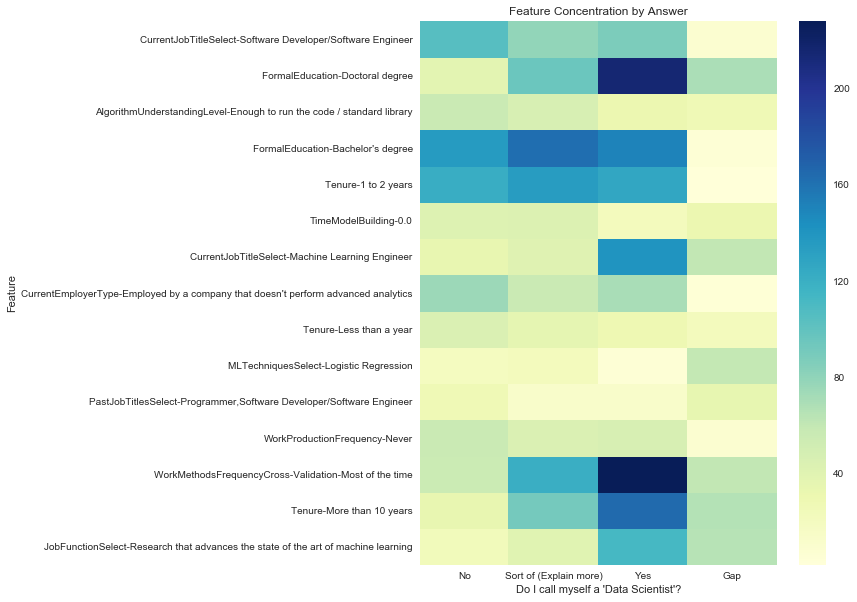

In [176]:
plt.figure(figsize=(8, 10))
ax = sns.heatmap(top_k_cohort, cmap='YlGnBu')
ax.set(xlabel='Do I call myself a \'Data Scientist\'?', ylabel='Feature', title='Feature Concentration by Answer')

The heatmap shows some interesting results.  People that identified as a Data Scientist clearly have a higher concentration in both Formal Education, having more Doctoral Degrees as well as using Cross Validation as a method frequently.

In [177]:
cohort_df = pd.concat([cohort_df, df[label]], axis=1)

In [178]:
correct = pd.DataFrame({'count' : df.groupby( [ "FormalEducation", label] ).size()}).reset_index()

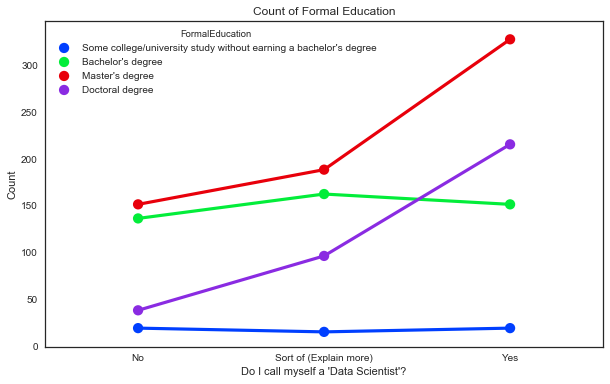

In [180]:
plt.figure(figsize=(10, 6))
sns.set_style("white")
plot_df = correct[correct['FormalEducation'] != 'I prefer not to answer']
ax = sns.pointplot(x="DataScienceIdentitySelect", hue='FormalEducation', y="count", hue_order=['Some college/university study without earning a bachelor\'s degree', 'Bachelor\'s degree','Master\'s degree','Doctoral degree'], data=plot_df, palette="bright")
ax.set(xlabel='Do I call myself a \'Data Scientist\'?', ylabel='Count', title='Count of Formal Education');

The graph above shows clearly that people who identify themselves as "Data Scientists" have higher rates of Master's and Doctoral Degrees. 

In [181]:
correct = pd.DataFrame({'count' : df.groupby( [ "AlgorithmUnderstandingLevel", label] ).size()}).reset_index()

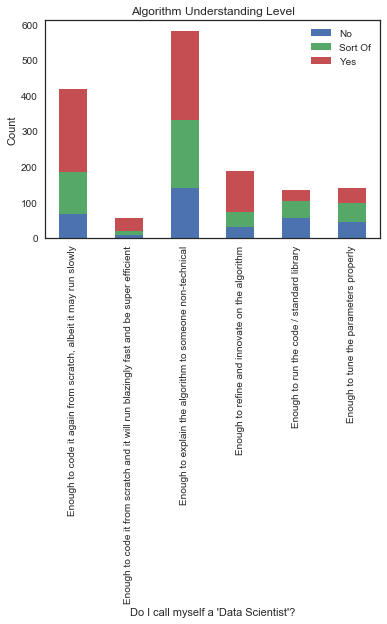

In [186]:
plt.figure(figsize=(8, 10));
correct_wide = correct.set_index(['AlgorithmUnderstandingLevel','DataScienceIdentitySelect']).unstack('DataScienceIdentitySelect');
correct_wide.columns=['No','Sort Of','Yes'];
ax = correct_wide.plot(kind='bar',stacked=True, title='Algorithm Understanding Level');
ax.set(xlabel='Do I call myself a \'Data Scientist\'?', ylabel='Count');

In [103]:
correct = pd.DataFrame({'count' : df.groupby( [ "CurrentJobTitleSelect", label] ).size()}).reset_index()

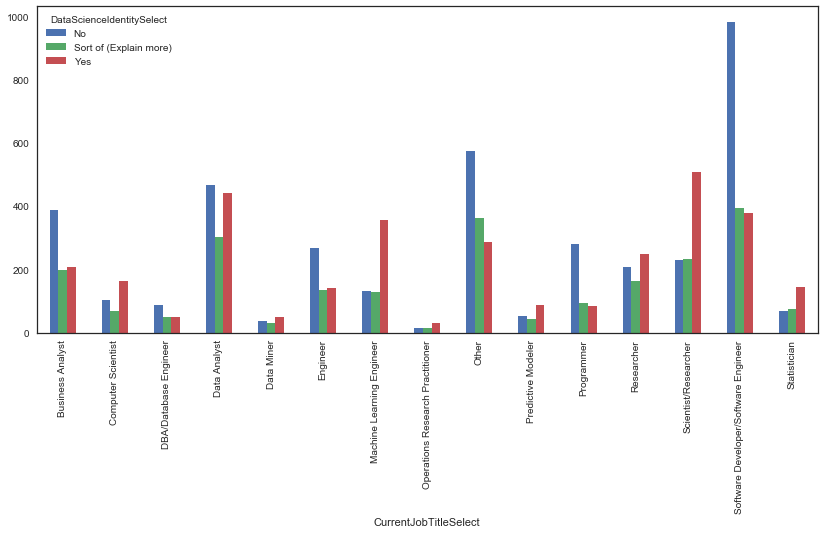

In [104]:
df.groupby(["CurrentJobTitleSelect", label])[label].count().unstack().plot(kind='bar',figsize=(14,6))

The results of this analysis were interesting.  A few features stood out that would help to identify people who consider themselves "Data Scientists".  First, this cohort has a strong representative population that has Doctoral Degrees.  While certainly not necessary for job functionality, it is a defining characteristic of this population.  Additionally, having the job title of "Software Developer" or "Software Engineer" is also a shown to identiy people that call themselves Data Scientists.  One of the interesting questions on the survey was:

At which level do you understand the mathematics behind the algorithms you use at work?

The answers available for selection were:

In [105]:
df['AlgorithmUnderstandingLevel'].value_counts()

Enough to explain the algorithm to someone non-technical                                1972
Enough to code it again from scratch, albeit it may run slowly                          1178
Enough to run the code / standard library                                                819
Enough to refine and innovate on the algorithm                                           626
Enough to tune the parameters properly                                                   587
Enough to code it from scratch and it will run blazingly fast and be super efficient     234
Name: AlgorithmUnderstandingLevel, dtype: int64

The cohort identified their understanding mostly as:

Enough to explain the algorithm to someone non-technical  
Enough to code it again from scratch, albeit it may run slowly

That seems technical enough, but the results of the feature selection indicated that the feature, Enough to run the code/standard library was a better feature to identify a member of the cohort.  This would indicate that people who only understand the algorithms enough to run the code/standard library would not have a high-enough understanding to call themselves "Data Scientists".

In [106]:
correct = pd.DataFrame({'count' : df.groupby( [ "Tenure", label] ).size()}).reset_index()

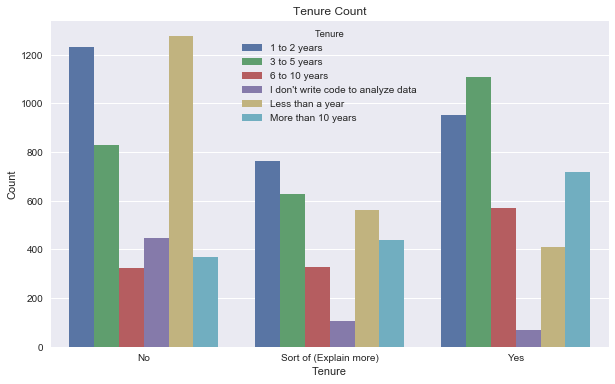

In [111]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
ax = sns.barplot(y="count", hue='Tenure', x="DataScienceIdentitySelect",  data=correct)
ax.set(xlabel='Tenure', ylabel='Count', title='Tenure Count')

Additionally, while the feature of Tenure '1 to 2 years' was critical in identifying the cohort, it is clear that people that refer to themselves as "Data Scientists" have longer Tenure, three years and greater.

In [187]:
final_features.columns

Index(['CurrentJobTitleSelect-Machine Learning Engineer',
       'CurrentJobTitleSelect-Software Developer/Software Engineer',
       'CurrentEmployerType-Employed by a company that doesn't perform advanced analytics',
       'FormalEducation-Bachelor's degree', 'FormalEducation-Doctoral degree',
       'Tenure-1 to 2 years', 'Tenure-Less than a year',
       'Tenure-More than 10 years',
       'PastJobTitlesSelect-Programmer,Software Developer/Software Engineer',
       'MLTechniquesSelect-Logistic Regression',
       'JobFunctionSelect-Build and/or run the data infrastructure that your business uses for storing, analyzing, and operationalizing data',
       'JobFunctionSelect-Research that advances the state of the art of machine learning',
       'WorkProductionFrequency-Never',
       'WorkMethodsFrequencyCross-Validation-Most of the time',
       'TimeModelBuilding-0.0',
       'AlgorithmUnderstandingLevel-Enough to run the code / standard library'],
      dtype='object')

In [192]:
me = [0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1]

In [193]:
model.predict_proba(me)

C:\Users\kim\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.59576784,  0.18877201,  0.21546014]])

Using myself as an example, I predict the probability that I would call myself a Data Scientist.  In this case, the model accurately predicts that I would not call myself a Data Scientist.

In [190]:
model.classes_

array(['No', 'Sort of (Explain more)', 'Yes'], dtype=object)

In [196]:
me = [1,0,1,1,1,0,0,1,1,0,1,0,0,1,0,1]
model.predict_proba(me)

C:\Users\kim\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.3318257 ,  0.16581026,  0.50236404]])

Changing a few features to alter the outcome to sway the prediction to Yes includes getting a Doctoral Degree, having a job title of ML Engineer, and working more with Cross Validation. 

People can use this model to identify what skills or features need to be enhanced to ultimately achieve their goal of becoming a Data Scientist.

In [132]:
from IPython.core.display import HTML 

def css_styling(): 
    styles = open("custom.css", "r").read() 
    return HTML(styles) 

css_styling()